In [1]:
import pandas as pd
from orion.data import load_signal, load_anomalies
from lintel import utils
import matplotlib.pyplot as plt

In [36]:
e1_signal = load_signal('E-1')
e1_label = load_anomalies('E-1')
e7_signal = load_signal('E-7')
e7_label = load_anomalies('E-7')

In [ ]:
e1_signal

In [ ]:
print(e1_signal[(e1_signal.timestamp >= e1_label.start[0]) & (e1_signal.timestamp <= e1_label.end[0])].index[0])
print(e1_signal[(e1_signal.timestamp >= e1_label.start[0]) & (e1_signal.timestamp <= e1_label.end[0])].index[-1])

In [ ]:
print(e7_signal[(e7_signal.timestamp >= e7_label.start[0]) & (e7_signal.timestamp <= e7_label.end[0])].index[0])
print(e7_signal[(e7_signal.timestamp >= e7_label.start[0]) & (e7_signal.timestamp <= e7_label.end[0])].index[-1])

In [ ]:
e7 = utils.signal_to_str(e7_signal, 7900, 8600)

In [ ]:
e7_ano_ind = utils.indices_to_str(8163-7900, 8443-7900)

In [ ]:
e1 = utils.signal_to_str(e1_signal, 7400, 8300)

In [ ]:
e1_ano_ind = utils.indices_to_str(7880-7400, 7910-7400)

In [ ]:
#m = utils.create_message_one_shot(e1, e7, e7_ano_ind)
m = utils.create_message_zero_shot(e1)

In [ ]:
m

In [ ]:
ans = utils.get_model_response(m)

In [ ]:
ans

In [ ]:
l = utils.LLMresponse_to_list(ans, 7400, 8300)

In [ ]:
t = utils.indices_to_timestamp(e1_signal, l)

In [ ]:
e1_signal.iloc[7500].timestamp

In [ ]:
res = utils.evaluate([i for i in range(e1_label.start[0], e1_label.end[0] + 1)], t, int(e1_signal.iloc[7400].timestamp), int(e1_signal.iloc[8300].timestamp))

In [ ]:
res

In [ ]:
e1_signal.iloc[l]

In [ ]:
plt.plot(e1_signal.iloc[7400:8301]['timestamp'], e1_signal.iloc[7400:8301]['value'])
plt.axvline(x = e1_label.start[0], color = 'k', linestyle = "--")
plt.axvline(x = e1_label.end[0], color = 'k', linestyle = "--")
plt.scatter(t, e1_signal.iloc[l].value, color = 'C2', label = "zero-shot")
# plt.scatter(l_2.iloc[GPT_res].index,l_2.iloc[GPT_res].values, color = 'C1', label = "one-shot")

In [ ]:
len(e1_signal)

In [ ]:
e1_signal.index[-1]

In [3]:
e1_signal = e1_signal[:5000]

In [7]:
#For rolling windows
size = 1000
step = 100
combine_res = []
for start in range(0, len(e1_signal)-size, step): 
    stop = start + size
    trunc_signal_str = utils.signal_to_str(e1_signal, start, stop)
    m = utils.create_message_zero_shot(trunc_signal_str)
    ans = utils.get_model_response(m)
    try:
        l = utils.LLMresponse_to_list(ans, start, stop)
    except ValueError: 
        print(ans)
    t = utils.indices_to_timestamp(e1_signal, l)
    combine_res.append(t)

In [8]:
len(combine_res)

40

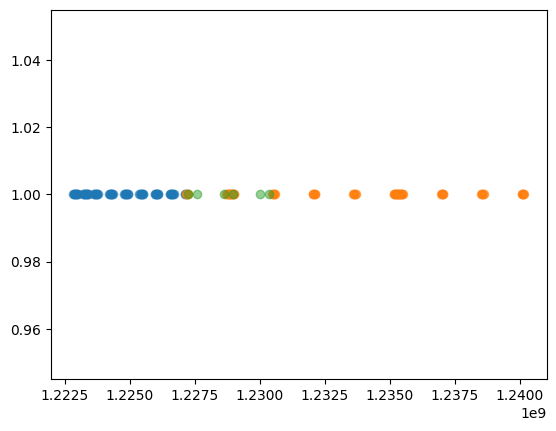

In [25]:
#plt.scatter(e1_signal[:5000]['timestamp'], [1 for i in range(5000)], color = 'grey', alpha = 0.1)
for res in combine_res[:3]:
    plt.scatter(res, [1 for i in range(len(res))], alpha = 0.5)
#plt.scatter(combine_res[1], [1 for i in range(len(combine_res[1]))], alpha = 0.2)

In [27]:
combine_res[3][-1] - combine_res[3][0]

5270400

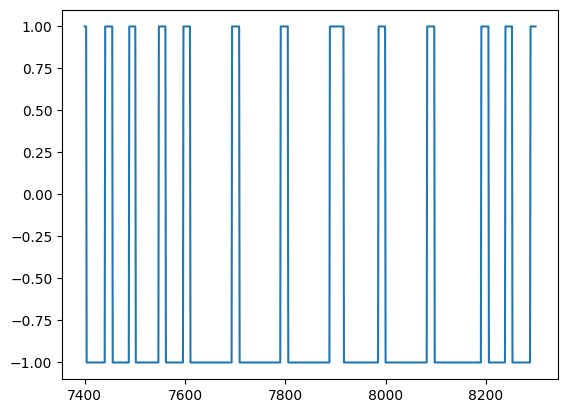

In [37]:
plt.plot(e1_signal.iloc[7400:8300].index, e1_signal.iloc[7400:8300].value)

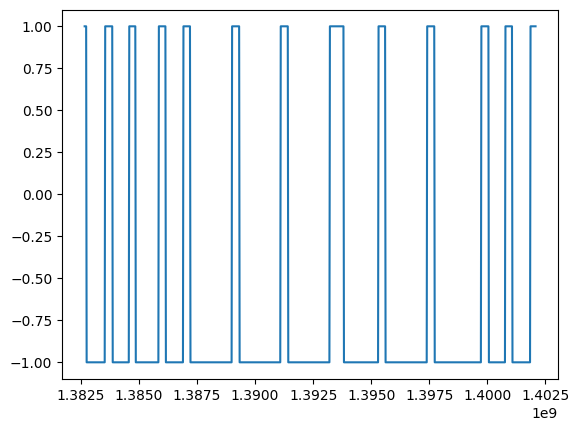

In [38]:
plt.plot(e1_signal.iloc[7400:8300].timestamp, e1_signal.iloc[7400:8300].value)

In [39]:
e1_signal

,timestamp,value
0,1222819200,-1.0
1,1222840800,-1.0
2,1222862400,-1.0
3,1222884000,-1.0
4,1222905600,-1.0
...,...,...
11391,1468864800,-1.0
11392,1468886400,-1.0
11393,1468908000,-1.0
11394,1468929600,-1.0


In [ ]:
utils.LLMresponse_to_list("6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378,", 0, 500)

In [ ]:
answer = "6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378,"
#remove space between digits
ans = answer.replace(" ", "")
#remove square brackets
ans = ans.replace("[", "")
ans = ans.replace("]", "")
#remove the extra comma at the end
if ans[-1] == ",": 
    ans = ans[:-1]
in_list = ans.split(",")
ind_list = [int(i) for i in in_list]

#remove indices that exceed the length of signal
signal_length = stop - start + 1
ind_list = [i for i in ind_list if i < signal_length]

#convert index of the truncated list back to the index of original signal 
ind_list = [i + start for i in ind_list]

In [ ]:
def avg_predicted_prob(message_fn, seq_query, seq_ex, ano_ind_ex, system_prompt_file='system_prompt.txt', max_iter = 5):
    m = message_fn(seq_query, seq_ex, ano_ind_ex, system_prompt_file='system_prompt.txt')
    seq = create_list_ind(seq_query)
    predicted = [0 for i in range(len(seq))]
    for _ in range(max_iter):
        ans = get_model_response(m)
        try:
            ans_list = create_list_ind(ans)
        except: 
            continue
        for i in ans_list: 
            try:
                predicted[i] += 1/max_iter
            except: 
                #More specific error
                pass
    return predicted
    

In [ ]:
pred = avg_predicted_prob(get_message_zero_shot, e1, e7, e7_ano_ind)

In [ ]:
pred_one_shot = avg_predicted_prob(get_message_with_example, e1, e7, e7_ano_ind)

In [ ]:
e1_ano_ind = list(range(7880-7600, 7910-7600+1))

In [ ]:
true_label = [0 for i in range(8200-7600+1)]
for i in range(8200-7600+1): 
    if i in e1_ano_ind:
        true_label[i] = 1

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(range(8200-7600+1)), pred_one_shot, label = 'one-shot predicted')
plt.bar(list(range(8200-7600+1)), pred, label = 'zero-shot predicted', alpha = 0.8)
plt.bar(list(range(8200-7600+1)), true_label, label = 'true anomaly', alpha = 0.8)
plt.legend()

In [ ]:
e1

In [ ]:
#test space option
e1 = signal_to_str(train_data, 7600, 8200, space = False)

In [ ]:
e1

In [ ]:
from orion.evaluation.point import point_accuracy, point_f1_score 

In [ ]:
data_span = (1222819200, 1222819205)
ground_truth = [
    1222819200, 
    1222819201, 
    1222819202
]
anomalies = [
    1222819201, 
    1222819202, 
    1222819203
]

In [ ]:
from orion.evaluation.point import point_accuracy, point_f1_score 

start, end = data_span

point_accuracy(ground_truth, anomalies, start=start, end=end) # 0.667
point_f1_score(ground_truth, anomalies, start=start, end=end) # 0.667

In [ ]:
d = {"a": 1}

In [ ]:
d['a']